**JavaScript Developer?** The [JavaScript version of the `osdatahub` library](https://github.com/OrdnanceSurvey/osdatahub-js) makes it easy to use OS data in the browser or in NodeJS.

# Using the NGD Features API with Python

The National Geographic Database (NGD) Features API provides access to Ordnance Survey's next generation NGD data.  
The NGD Features API is a premium or public sector product only. If you are looking to access free data, you should use the [OS Features API](https://osdatahub.os.uk/docs/wfs/overview).

There are many ways to access the National Geographic Database:
- If you'd like to download data using a GUI, [Select+Build](https://www.ordnancesurvey.co.uk/business-government/products/os-select-build), allows you to download multiple types of features at once, delivered as part of the [OS Data Hub](https://osdatahub.os.uk).
- The [NGD Features API](https://www.ordnancesurvey.co.uk/business-government/products/os-ngd-api-features) allows for programatic access to NGD data in `GeoJSON` format.

For Python developers, the [`osdatahub`](https://github.com/OrdnanceSurvey/osdatahub) Python library wraps almost all APIs in the [OS Data Hub](https://osdatahub.os.uk/) and provides an easy, Pythonic way to get data from Ordnance Survey. We have now added support for the NGD Features API, so you can access OS' latest product and next-generation data with only a few lines of Python code.

## 1. Getting Started

### 1.1 Importing your OS Data Hub API Key
In order to access the NGD, you  must first have an OS Data Hub API key, a notebook explaining the process of registering an account and getting an API key is available to read [here](https://github.com/OrdnanceSurvey/osdatahub/blob/master/Examples/Setting%20up%20an%20API%20key.ipynb). When you're choosing which APIs you want to add to your project, you must select "OS NGD API - Features" to use NGD data.


Once you have an API key, you can load your API key in by either passing it in as a string, or setting it as an environment variable. We recommend using the [`python-dotenv`](https://pypi.org/project/python-dotenv/) library to securely store your API keys in a `.env` file without risk of accidentally committing them in your repo (by adding it to your `.gitignore` file).

To use the `python-dotenv` package, simply:
1. Install with pip: `pip install python-dotenv`
2. Create a `.env` file in the root directory of your project
3. Add your API key to the file: `OS_API_KEY=[YOUR API KEY HERE]`

In [1]:
# Option 1: Assign as a string
# This is less secure, you may commit your API key by accident!


from os import environ
key = environ.get("OS_API_KEY")

Nice one! We can now read the contents of the `key` variable to make sure that worked as expected:

### 1.2 Importing the NGD Module
To import the NGD module from `osdatahub`, write the following:

In [5]:
from osdatahub import NGD

## 2. Discovering Collections
The NGD contains multiple themes and collections:
- A `theme` is a family of `collections`, for example, there is a theme called 'Buildings'.
- A `collection` is a group of features. The Buildings theme contains two collections: 'BuildingLine' and 'BuildingPart'.

You can read more about the NGD Features API's themes and collections in the [Technical Specification](https://osdatahub.os.uk/docs/ofa/technicalSpecification).

To quickly retrieve a list of available data, you can query the API directly using the `NGD` module we previously imported:

In [6]:
ngd_collections = NGD.get_collections()

This will return a JSON object, which we can then interate through to return metadata about each collection.

In [5]:
# 🔎 run this cell to view a list of all available NGD collections
for collection in ngd_collections['collections']:
    print(f' - {collection["title"]} ({collection["id"]})')

 - Building Line v1 (bld-fts-buildingline-1)
 - Building Part v1 (bld-fts-buildingpart-1)
 - Named Area v1 (gnm-fts-namedarea-1)
 - Named Point v1 (gnm-fts-namedpoint-1)
 - Land v1 (lnd-fts-land-1)
 - Landform v1 (lnd-fts-landform-1)
 - Landform Line v1 (lnd-fts-landformline-1)
 - Landform Point v1 (lnd-fts-landformpoint-1)
 - Land Point v1 (lnd-fts-landpoint-1)
 - Site v1 (lus-fts-site-1)
 - Site Access Location v1 (lus-fts-siteaccesslocation-1)
 - Site Routing Point v1 (lus-fts-siteroutingpoint-1)
 - Compound Structure v1 (str-fts-compoundstructure-1)
 - Structure v1 (str-fts-structure-1)
 - Structure Line v1 (str-fts-structureline-1)
 - Structure Point v1 (str-fts-structurepoint-1)
 - Cartographic Rail Detail v1 (trn-fts-cartographicraildetail-1)
 - Rail v1 (trn-fts-rail-1)
 - Road Line v1 (trn-fts-roadline-1)
 - Road Track Or Path v1 (trn-fts-roadtrackorpath-1)
 - Connecting Link v1 (trn-ntwk-connectinglink-1)
 - Connecting Node v1 (trn-ntwk-connectingnode-1)
 - Ferry Link v1 (trn-

## 3. Loading NGD Data into a GeoDataFrame
We'll now walk through the process of acquiring data from the NGD Building Part collection (`bld-fts-buildingpart`) and importing this data into a GeoDataFrame.  

### 3.1 Requesting NGD Data
To get the first 100 features in the collection, you simply need to make an `NGD` object and then run the `query()` method:

In [7]:
collection = "bld-fts-buildingpart"
ngd_building_part = NGD(key, collection)

# make the query and contact the API
features = ngd_building_part.query(max_results=4)

The API returns an OGC-compliant GeoJSON, which is easy to import into other libraries for analysis.


### 3.2 Importing into a GeoDataFrame
If you haven't already, import the `geopandas` library:

In [8]:
import geopandas as gpd

And now, import the NGD data using the `.from_features` function.

In [9]:
gdf = gpd.GeoDataFrame.from_features(features)

Let's take a look at a preview of the data (the `.head` function). As you'll see, NGD data is rich in attribution:

In [10]:
# 🔎 run this cell to preview the contents of the GeoDataFrame
gdf.head()

,geometry,osid,toid,theme,changetype,isobscured,description,versiondate,geometry_area,height_source,...,absoluteheightroofbase,description_updatedate,oslandcover_updatedate,oslanduse_evidencedate,relativeheightroofbase,versionavailabletodate,firstdigitalcapturedate,description_evidencedate,oslandcover_evidencedate,versionavailablefromdate
0,"POLYGON ((-3.97031 55.74255, -3.97019 55.74249...",000000b1-0556-4231-a52a-9b5b8b82dfbf,osgb1000041024621,Buildings,Modified Attributes,False,Building,2022-09-18,59.200650,Ordnance Survey,...,110.85,2006-08-30,2006-08-30,2006-08-30,5.85,None,1991-09-18,2006-08-30,2006-08-30,2022-09-19T00:00:00Z
1,"POLYGON ((1.72756 52.66142, 1.72755 52.66144, ...",00000183-3ae0-4f05-adb8-a5792d09f55f,osgb5000005167584940,Buildings,New,False,Building,2022-08-26,9.499142,Ordnance Survey,...,6.21,2015-10-29,2015-10-29,2015-03-11,0.82,None,2015-11-12,2015-03-11,2015-03-11,2022-08-27T00:00:00Z
2,"POLYGON ((0.19415 51.59241, 0.19411 51.59241, ...",000001d6-8217-4f7a-a70e-3757eb76c9e4,osgb1000000360448,Buildings,New,False,Building,2022-08-26,15.258750,Ordnance Survey,...,37.13,1993-04-01,1993-04-01,1993-04-01,2.43,None,1993-04-01,1993-04-01,1993-04-01,2022-08-27T00:00:00Z
3,"POLYGON ((-1.45472 52.39610, -1.45479 52.39613...",00000208-a659-49f9-a587-ab26cb2b2248,osgb1000017249389,Buildings,New,False,Building,2022-08-26,12.806250,Ordnance Survey,...,71.95,1993-05-01,1993-05-01,1993-05-01,1.96,None,1993-05-01,1993-05-01,1993-05-01,2022-08-27T00:00:00Z


You can learn more about importing data from the `osdatahub` package into other common Python libraries [in this example](https://github.com/OrdnanceSurvey/osdatahub/blob/master/Examples/Plotting%20API%20Results%20-%20GeoPandas%2C%20Matplotlib%20and%20Contextily.ipynb).

## 4. Adding Filters

Filters can help you limit the scope of your query, using spatial, temporal and contextual parameters.  
The NGD Features API uses Common Query Language (CQL) to allow you to filter data using the attribution set of each collection.

- Spatial: `extent`  
You can specify any polygon to query by using the `Extent` class. You can learn more about using `Extent` [here](https://github.com/OrdnanceSurvey/osdatahub/blob/master/Examples/Defining%20Extents%20for%20API%20Queries.ipynb)

- Temporal: `start_datetime` and `end_datetime`  
If you want to only get features that have a temporal property, you can specify date ranges to query within. If you want to get features for a single time, simply provide the same argument for both parameters.

- Contextual: `cql_filter`  
The NGD API supports a generic filter grammar called the Common Query Language (CQL) to further filter your query using human readable commands. You can find out more about the operations that the API supports in the Queryables section of the [Technical Specification](https://osdatahub.os.uk/docs/ofa/technicalSpecification). The CQL filter allows you to specify specific properties for features as well as spatial filters.

In addition, the `osdatahub` library permits you to specify the maximum number of features to return (by default, 100 features):

- `max_results`  
Allows you to specify the maximum number of features you'd like to receive. Default is 100.

- `offset`  
Skips past the specified number of features in the collection. Default is 0.

### 4.1 Specifying an Extent (Bounding Box)

In our case, we want to get features that are only within a certain bounding box in Manchester.  
We can specify an extent using the `Extent` submodule:

In [11]:
from osdatahub import Extent

Now we can use the `Extent` module to specify the geometry, and then pass this into the `ngdBuildingPart` query:

In [17]:
extent = Extent.from_bbox((-2.244973,53.476620,-2.237799,53.480525), crs="CRS84")
features = ngd_building_part.query(extent=extent, max_results=4) # note: remove max_results param to get all features!

# 🔎 run this cell to see the contents of 'features'
features

{'type': 'FeatureCollection',
 'links': [{'href': 'https://api.os.uk/features/ngd/ofa/v1/collections/bld-fts-buildingpart-1/items?limit=4&filter=INTERSECTS%28geometry%2C%20POLYGON%20%28%28-2.237799%2053.47662%2C%20-2.237799%2053.480525%2C%20-2.244973%2053.480525%2C%20-2.244973%2053.47662%2C%20-2.237799%2053.47662%29%29%29&filter-crs=http%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84',
   'rel': 'self',
   'type': 'application/geo+json',
   'title': "All features from the 'Building Part v1' collection"},
  {'href': 'https://api.os.uk/features/ngd/ofa/v1/collections/bld-fts-buildingpart-1/items?offset=4&limit=4&filter=INTERSECTS%28geometry%2C%20POLYGON%20%28%28-2.237799%2053.47662%2C%20-2.237799%2053.480525%2C%20-2.244973%2053.480525%2C%20-2.244973%2053.47662%2C%20-2.237799%2053.47662%29%29%29&filter-crs=http%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84',
   'rel': 'next',
   'type': 'application/geo+json',
   'title': 'Next page'}],
 'timeStamp': '2023-08-24T10:11:0

### 4.2 Plotting

In [ ]:
# Choose data product
product = 'zoomstack_surface_water'

# Define query extent
W, S = (342730, 137700)
E, N = (347700, 141642)
crs = "EPSG:27700"
extent = Extent.from_bbox((W, S, E, N), crs=crs)

# Query API
# key = os.environ.get("OS_API_KEY")
key = os.environ.get('OS_API_KEY')
surface_water = FeaturesAPI(key, product, extent)
surface_water_results = surface_water.query(limit=100000)

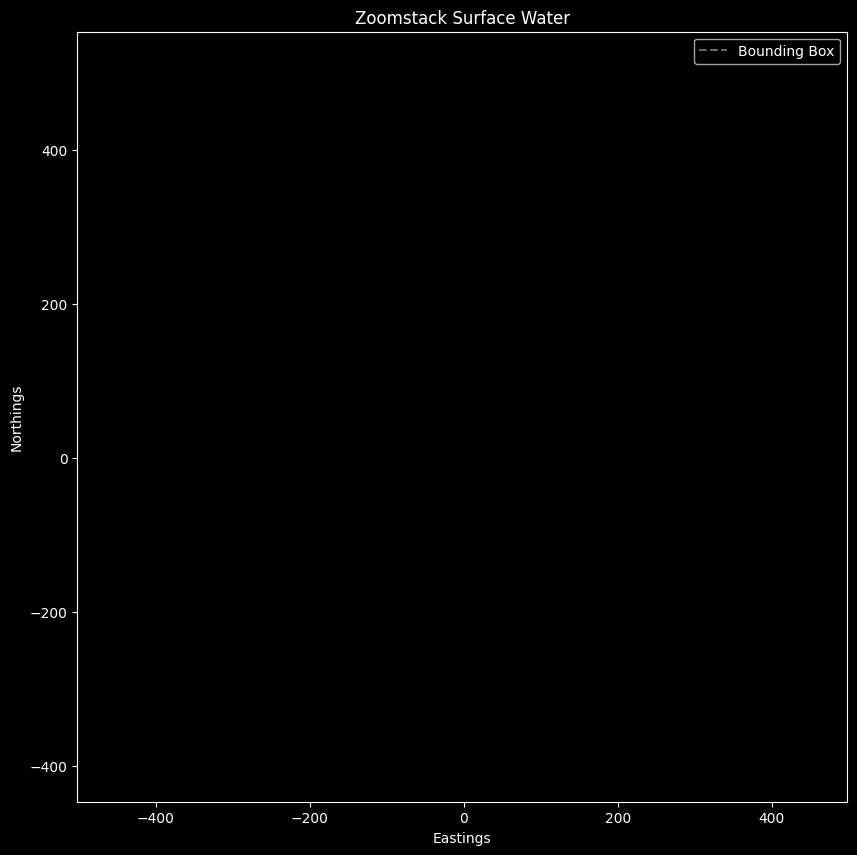

In [15]:
import matplotlib.pyplot as plt

ax = gdf.plot(color="indigo", figsize=(12, 10))

ax.plot(*zip(*extent.polygon.exterior.coords), color="dimgray",
        linestyle='--', label="Bounding Box")

# Define limits of the plot
bounds = extent.polygon.bounds
# margin adds a bit of space around the bounding box
margin = 500
x_limits = (bounds[0] - margin, bounds[2] + margin)
y_limits = (bounds[1] - margin, bounds[3] + margin)
ax.set_xlim(*x_limits)
ax.set_ylim(*y_limits)

# Add labels
ax.set_xlabel("Eastings")
ax.set_ylabel("Northings")
ax.set_title("Zoomstack Surface Water")
plt.legend()
plt.show()